In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
aisles= pd.read_csv("D:\\Kaggle\\Instacart\\aisles.csv")
departments= pd.read_csv("D:\\Kaggle\\Instacart\\departments.csv")
products=pd.read_csv("D:\\Kaggle\\Instacart\\products.csv")
# orders_prior=pd.read_csv("D:\\Kaggle\\Instacart\\order_products__prior.csv")


In [3]:
orders_train=pd.read_csv("D:\\Kaggle\\Instacart\\order_products__train.csv")

In [4]:
orders=pd.read_csv("D:\\Kaggle\\Instacart\\orders.csv")


In [ ]:
# aisles.describe()
# departments.describe()
# products.info()
#  orders_train.info()
# orders.info()
orders_min.head()

In [5]:
orders=orders[orders.eval_set=="train"]

In [6]:
orders.drop(["eval_set"],axis=1)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,11,4,8,14.0
25,1492625,2,15,1,11,30.0
49,2196797,5,5,0,11,6.0
74,525192,7,21,2,11,6.0
78,880375,8,4,1,14,10.0
82,1094988,9,4,6,10,30.0
88,1822501,10,6,0,19,30.0
115,1827621,13,13,0,21,8.0
129,2316178,14,14,2,19,11.0
200,2180313,17,41,3,10,30.0


In [10]:
orders_min=orders.iloc[0:10000,:]

In [11]:
orders_min.order_id.unique

<bound method Series.unique of 10        1187899
25        1492625
49        2196797
74         525192
78         880375
82        1094988
88        1822501
115       1827621
129       2316178
200       2180313
207       2461523
256       1854765
277       3402036
296        965160
395       2614670
439       3110252
448         62370
485        698604
557       1524161
570       3173750
594       2032076
611       2803975
623       1864787
627       2436259
652       1947848
658       2906490
669       2924697
678        519514
746       1750084
778       1647290
           ...   
257462      80707
257492    2717055
257500     584172
257516    1704078
257528    1748262
257554    1373979
257598    2748829
257602    2364483
257608    2569324
257620     344730
257624    2191832
257641    2303111
257674     218219
257689    1131586
257695    2178599
257706    1439573
257711    3104870
257744     474510
257748    2244392
257760    1425003
257766    1397783
257770     482286
257776    12955

In [12]:
orders_train_min=orders_train.iloc[0:10000,:]

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131209 entries, 10 to 3421082
Data columns (total 7 columns):
order_id                  131209 non-null int64
user_id                   131209 non-null int64
eval_set                  131209 non-null object
order_number              131209 non-null int64
order_dow                 131209 non-null int64
order_hour_of_day         131209 non-null int64
days_since_prior_order    131209 non-null float64
dtypes: float64(1), int64(5), object(1)
memory usage: 8.0+ MB


In [ ]:
# orders_train["user_id"]=orders["product_id"].apply(lambda x: products[products.product_id==x].product_name)

In [71]:
# not used
# orders_train_min["user_id"]= orders_train_min.apply(lambda x: orders[orders.order_id==x.order_id].user_id,axis=1)
d=orders_train_min.order_id.apply(lambda x: orders[orders.order_id==x].user_id)


In [81]:
a=orders_train_min.order_id.apply(lambda x: orders[orders.order_id==x].user_id)
# orders[orders.order_id==1]
# d.columns

In [7]:
mergedData=pd.merge(left=orders_train,right=orders[["order_id","user_id"]],how='left',on="order_id")

In [8]:
# mergedData=mergedData.drop(columns="user_id_x")
# mergedData=mergedData.rename(columns={"user_id_y":"user_id"})
mergedData.head()

,order_id,product_id,add_to_cart_order,reordered,user_id
0,1,49302,1,1,112108
1,1,11109,2,1,112108
2,1,10246,3,0,112108
3,1,49683,4,0,112108
4,1,43633,5,1,112108


In [9]:
product_counts=mergedData.product_id.value_counts()
productList=pd.DataFrame({'product_Id':product_counts.index, 'productCount':product_counts})
# productList.reset_index()


In [10]:
# a=productList.apply(lambda x : products[products.product_id== x.productId].user_id)
productList["productName"]=productList.product_Id.apply(lambda x : str(products[products["product_id"]== x].product_name.unique()[0]))
# productList.product_Id
# productList=productList.loc[:,["product_Id","count"]]

In [11]:
productList.head()

,product_Id,productCount,productName
24852,24852,18726,Banana
13176,13176,15480,Bag of Organic Bananas
21137,21137,10894,Organic Strawberries
21903,21903,9784,Organic Baby Spinach
47626,47626,8135,Large Lemon


In [12]:
dataToShow=productList.sort_values?

In [14]:
dataToShow=productList.sort_values(by="productCount",ascending=False)
dataToShow=dataToShow.iloc[:10,:]
dataToShow=dataToShow.reset_index()

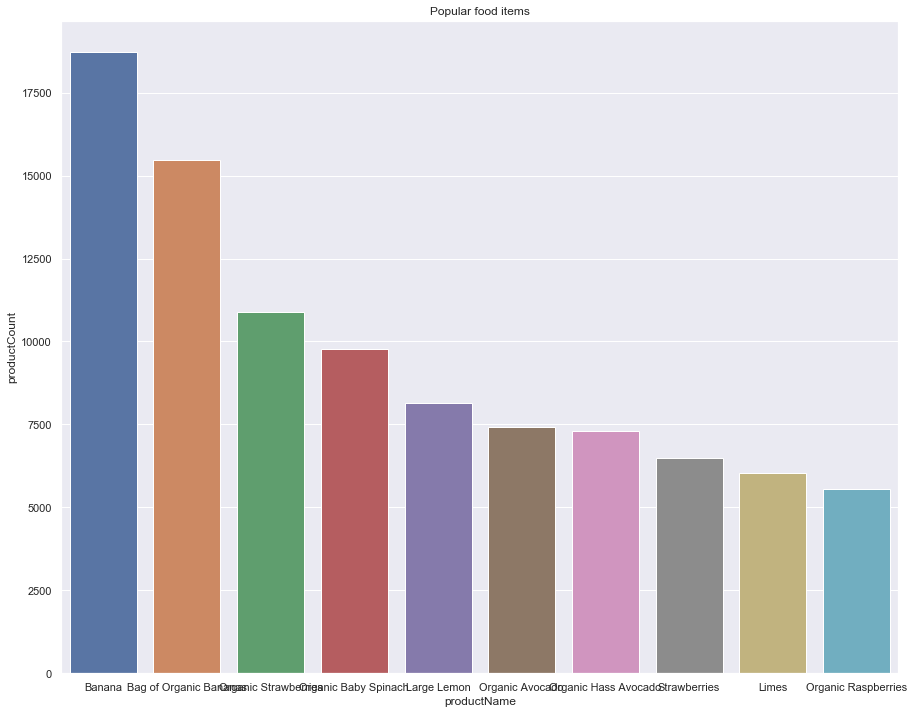

In [15]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,12)})
ax=sns.barplot(x=dataToShow.productName,y=dataToShow.productCount).set_title("Popular food items")

In [16]:
dow=orders.groupby("order_dow")["order_dow"].count()

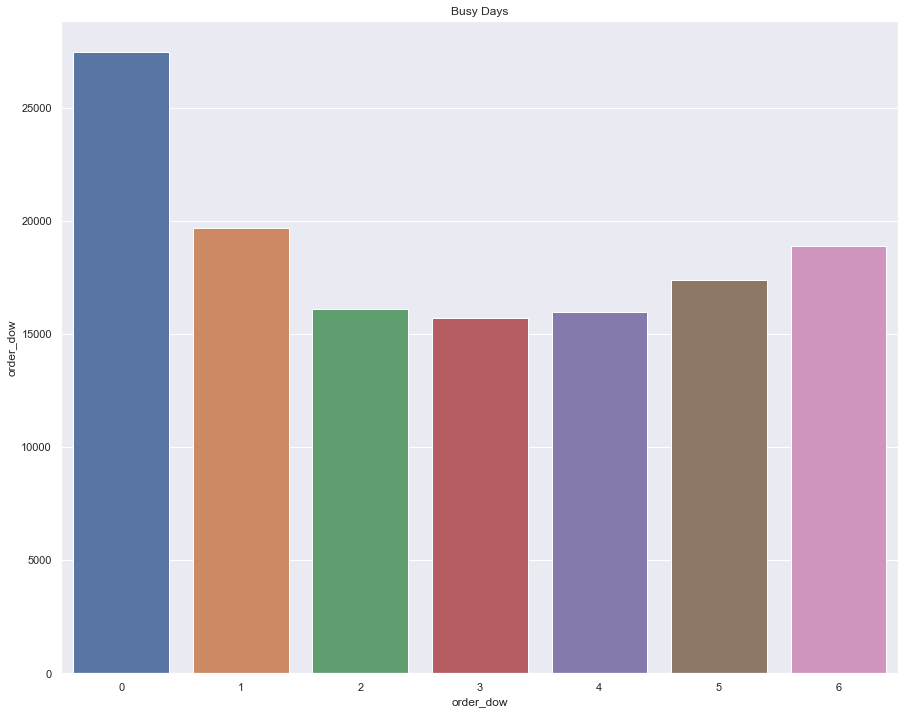

In [17]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,12)})
ax=sns.barplot(x=dow.index,y=dow).set_title("Busy Days")

In [18]:
hod=orders.groupby("order_hour_of_day")["order_hour_of_day"].count()

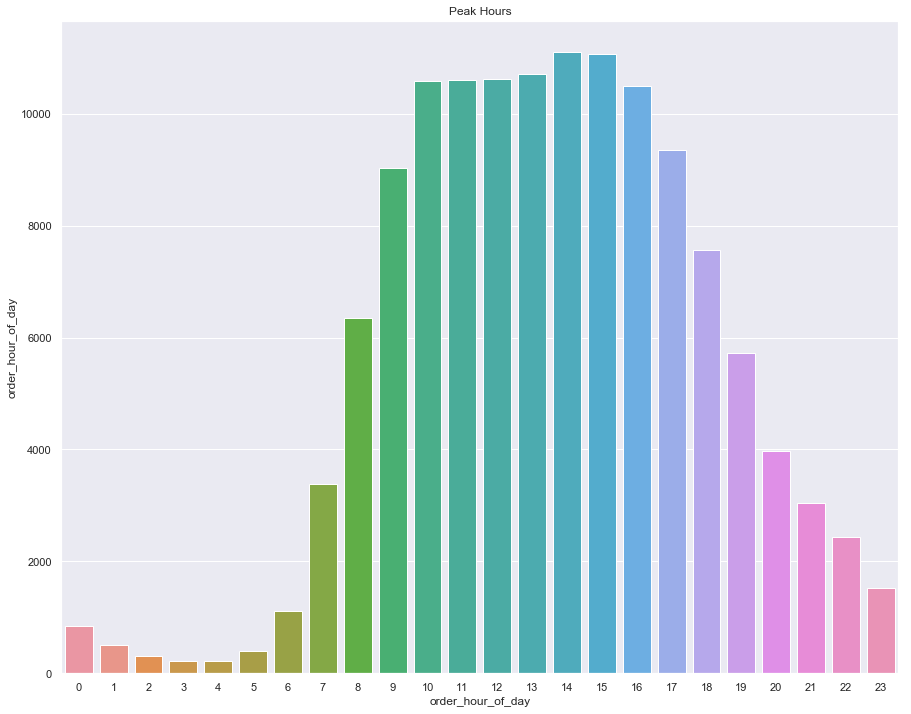

In [19]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,12)})
ax=sns.barplot(x=hod.index,y=hod).set_title("Peak Hours")


In [49]:
reorderedItems=mergedData[mergedData.reordered==1].groupby("product_id")["product_id"].count()

In [39]:
reorderedItems.sort_values(by="productCount",ascending=False)

In [50]:
reOrderedItemsDf=pd.DataFrame({"productId":reorderedItems.index,"productCount":reorderedItems})

In [51]:
reOrderedItemsDf.head()

,productId,productCount
product_id,,
1,1,49
2,2,1
3,3,6
4,4,14
5,5,1


In [52]:
reOrderedItemsDf=reOrderedItemsDf.sort_values(by="productCount",ascending=False)

In [78]:
reOrderedItemsDf=reOrderedItemsDf.iloc[0:10,:]

reOrderedItemsDf["productName"]=reOrderedItemsDf.productId.apply(lambda x: products[products.product_id==x].product_name.unique()[0])

In [79]:
reOrderedItemsDf

,productId,productCount,productName
product_id,,,
24852,24852,16557,Banana
13176,13176,13362,Bag of Organic Bananas
21137,21137,8603,Organic Strawberries
21903,21903,8055,Organic Baby Spinach
47766,47766,6226,Organic Avocado
47209,47209,6042,Organic Hass Avocado
47626,47626,5923,Large Lemon
16797,16797,4786,Strawberries
27966,27966,4279,Organic Raspberries


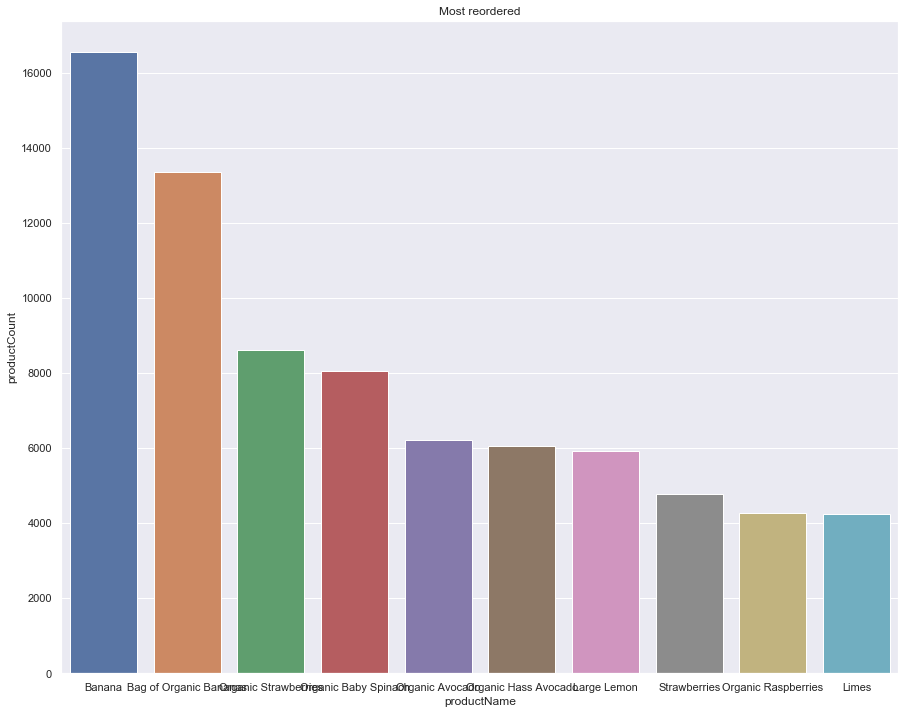

In [80]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,12)})
ax=sns.barplot(x=reOrderedItemsDf.productName,y=reOrderedItemsDf.productCount).set_title("Most reordered")


In [38]:
%qtconsole